In [1]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt

# Data Loading

In [4]:
with open("data/splited_data.pickle", "rb") as file:
    data = pickle.load(file)
    X_train = data["X_train"]
    y_train = data["y_train"]

In [6]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1648,x,s,w,f,n,f,w,b,h,t,...,f,w,w,p,w,o,e,n,s,g
5183,x,s,b,t,f,f,c,b,w,t,...,s,w,w,p,w,o,p,h,v,u
304,x,y,w,t,l,f,c,b,g,e,...,s,w,w,p,w,o,p,k,s,g
5112,f,y,y,f,f,f,c,b,p,e,...,k,b,p,p,w,o,l,h,y,p
1371,x,s,n,f,n,f,w,b,p,t,...,s,w,w,p,w,o,e,k,s,g


In [7]:
y_train.head()

1648    1
5183    0
304     1
5112    0
1371    1
Name: class, dtype: int64

# Descreptive Analysis

## Overview of the Atributes

In [15]:
X_train.shape[1]

22

In [14]:
X_overview = X_train.apply(lambda x: x.unique()).to_frame("Unique Values")
X_overview["Number of Unique Values"] = X_overview["Unique Values"].apply(len)
X_overview

,Unique Values,Number of Unique Values
cap-shape,"[x, f, b, k, s, c]",6
cap-surface,"[s, y, f, g]",4
cap-color,"[w, b, y, n, g, e, p, u, r, c]",10
bruises,"[f, t]",2
odor,"[n, f, l, a, c, s, y, p, m]",9
gill-attachment,"[f, a]",2
gill-spacing,"[w, c]",2
gill-size,"[b, n]",2
gill-color,"[h, w, g, p, b, k, n, e, u, y, o, r]",12
stalk-shape,"[t, e]",2


In [19]:
one_hot_attributes = X_overview["Number of Unique Values"].sub(1).sum()
one_hot_attributes

95

## Atributes distribution regarding the target variable

In [23]:
def stacked_bar(X_col, y, percent=False):
    tab = pd.crosstab(X_col, y)
    if percent:
        tab = tab.apply(lambda x: x*100/sum(x), axis=1)
    tab.sort_values(by=[1, 0], inplace=True)    
    tab.plot(kind="bar", stacked=True, ax=plt.gca())
    plt.title(X_col.name)
    plt.xlabel(None)

In [24]:
def stacked_subplots(X, y, percent, n_rows=5, n_cols=5, figsize=[20, 20]):
    plt.figure(figsize=figsize)
    for i, col in enumerate(X.columns):
        plt.subplot(n_rows, n_cols, i + 1)
        stacked_bar(X_col=X[col], y=y, percent=percent)
    plt.show()

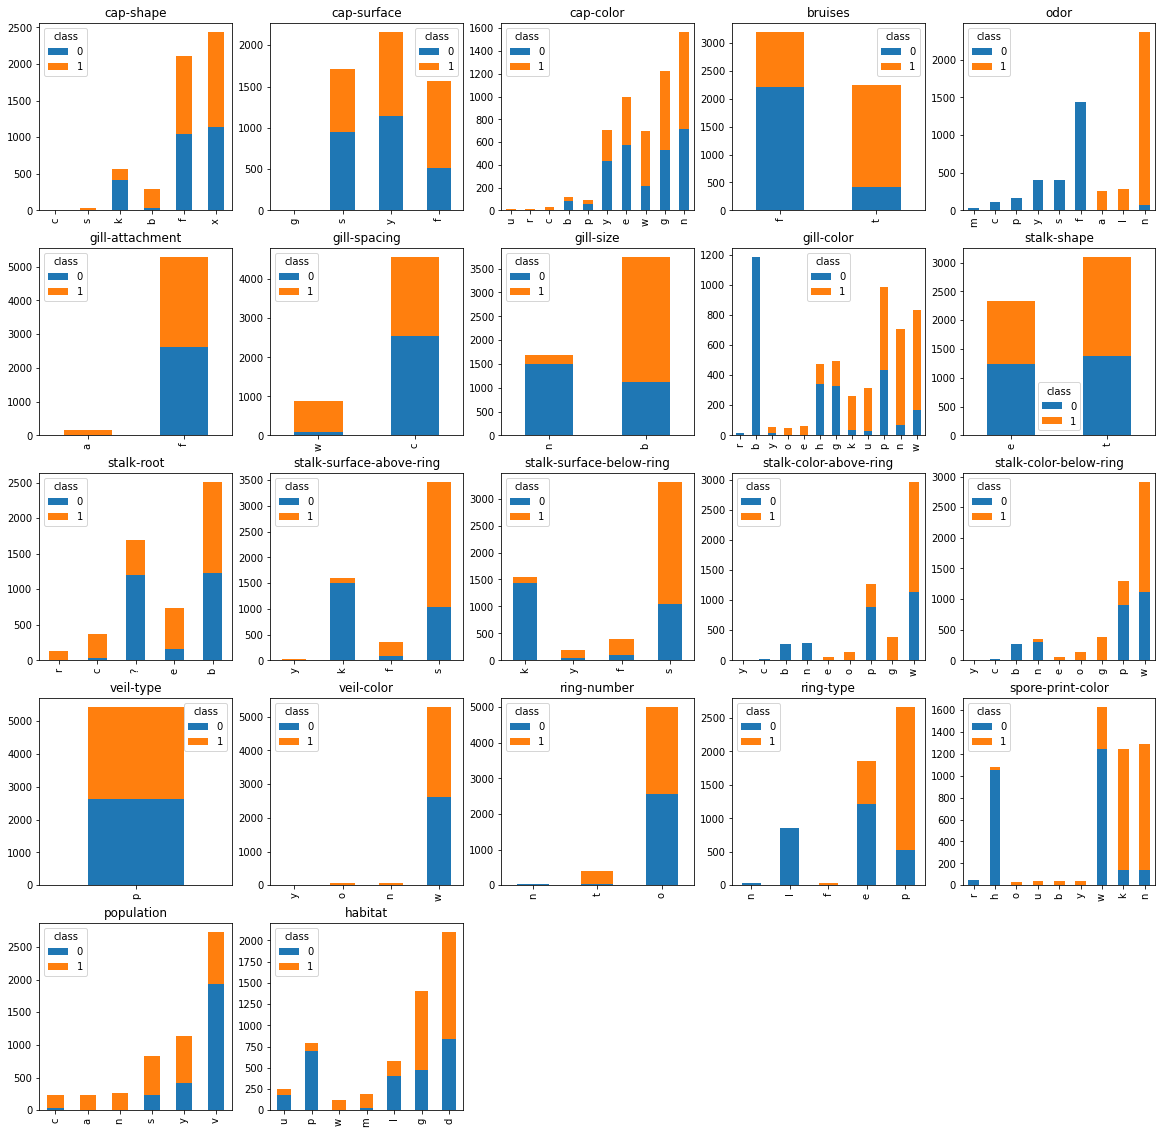

In [25]:
stacked_subplots(X=X_train, y=y_train, percent=False)

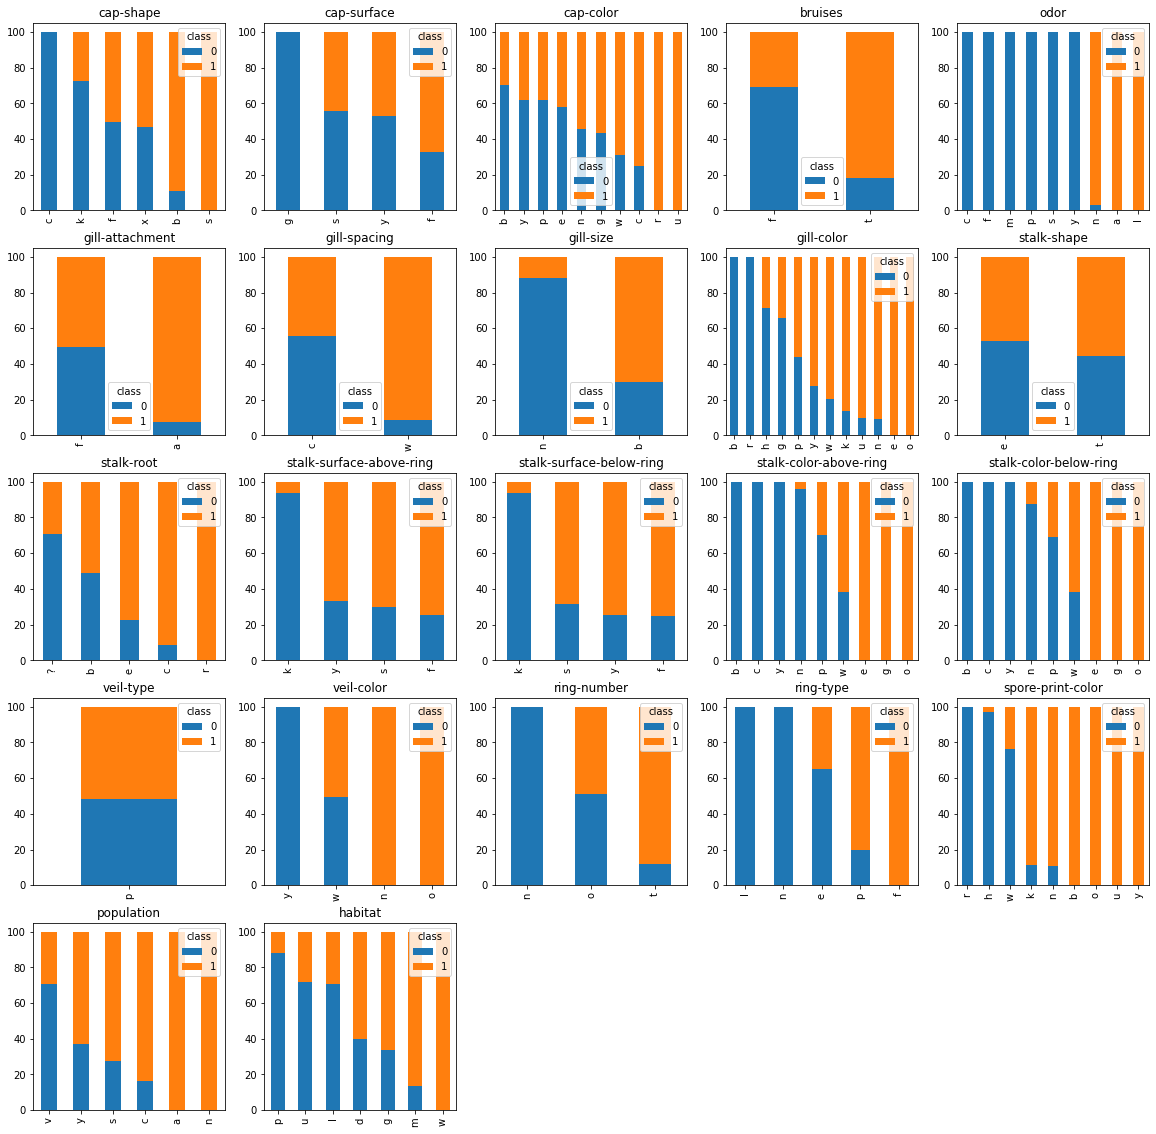

In [26]:
stacked_subplots(X=X_train, y=y_train, percent=True)